# Linear models: Classification

**Name:** Prithivi Raaj K

**RollNo:** 21z238

**Importing the libraries**

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.exceptions import ConvergenceWarning

# Data Preprocessing

**Loading the dataset**

In [120]:
dataset = pd.read_csv("weatherAUS.csv")
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Analysing the dataset**

Dropping the **Date** column, as it does not add much significance to classification.


In [121]:
dataset = dataset.drop(columns=['Date'])

print("Columns in the dataset: ")
print(dataset.columns)

Columns in the dataset: 
Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

**Checking Null Values** in each column to handle them later.



In [123]:
print("Missing values in each column of the dataset -")
print(dataset.isna().mean()* 100,2)

Missing values in each column of the dataset -
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64 2


**Identifying Categorical Columns**

In [124]:
cat_columns = dataset.select_dtypes(include='object').columns
cat_columns = cat_columns[cat_columns!='Date']

print("Categorical Columns: ")
print(cat_columns)

Categorical Columns: 
Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


**Identifying Numerical Columns**

In [125]:
num_columns = dataset.select_dtypes(include='number').columns

print("Numerical Columns: ")
print(num_columns)

Numerical Columns: 
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


**Handling Null Values**


*   Filling the null values in the **numerical columns** with the **Mean value** (provides central measure) of the column.
*   Filling the null values in the **categorical columns** with the **Median value** (most frequently occuring value) of the column.



In [126]:
dataset['RainToday'].fillna('Unknown',inplace=True)

In [127]:
dataset.dropna(subset=['RainTomorrow'],inplace=True)

In [128]:
dataset[num_columns] = dataset[num_columns].fillna(dataset[num_columns].mean())

for col in cat_columns:
  dataset[col] = dataset[col].fillna(dataset[col].mode().iloc[0])

The dataset after handling the missing values -

In [129]:
print("After handling null values in the dataset - ")
print(dataset.isna().mean()* 100,2)

After handling null values in the dataset - 
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64 2


**Encoding Categorical Columns**

*   Apply **Label Encoding** for "RainToday" and "RainTomorrow" as the columns have only 2 values - Yes or No
*   Apply **One-Hot Encoding** to other categorical columns, since there are more than two unique values in those columns



In [130]:
label_encoder = LabelEncoder()
for i in cat_columns[4:]:
  dataset[i] = label_encoder.fit_transform(dataset[i])

In [131]:
dataset = pd.get_dummies(dataset,columns=cat_columns[0:4])

In [132]:
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


Size of the dataset before handling outliers -

In [133]:
print("Dataset size before handling outliers: ",dataset.shape)

Dataset size before handling outliers:  (142193, 115)


**Handling Outliers using z_scores**

Z-score is used to handle outliers by providing a standardized measure of how far each data point is from the mean of the dataset in terms of standard deviations.

After calculating the z-score for each data point, outliers can be identified based on their z-score. Typically, outliers are defined as data points that fall below (or above) a certain threshold of standard deviations from the mean.  **Standard threshold is +(-)3**



In [134]:
z_scores = stats.zscore(dataset[num_columns])
abs_z_score = np.abs(z_scores)
filtered_entries = (abs_z_score < 3).all(axis=1)
dataset = dataset[filtered_entries]

In [135]:
print("Dataset size after handling outliers: ",dataset.shape)

Dataset size after handling outliers:  (133601, 115)


In [136]:
x = dataset.drop(columns=['RainTomorrow'])
y = dataset['RainTomorrow']

**Balancing the Dataset**

To overcome imbalance classification, we need to balance the dataset before classification techniques can be applied on it.

The **RandomOverSampler** is used to balance the class distribution by oversampling the minority class, thereby creating a more balanced dataset for training classification models.


In [137]:
ros = RandomOverSampler()
X_balanced, Y_balanced = ros.fit_resample(x,y)

**Splitting the dataset after balancing it**

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X_balanced, Y_balanced, test_size=0.2, random_state=0)

# Logistic Regression

**Fitting logistic regression**

In [139]:
logistic_classifier = LogisticRegression(max_iter=1500, solver='liblinear')
logistic_classifier.fit(X_train,Y_train)

y_pred = logistic_classifier.predict(X_test)

**Confusion Matrix**

In [140]:
conf_matrix = confusion_matrix(Y_test,y_pred)

print("Confusion matrix for logistic regression:")
print(conf_matrix)

Confusion matrix for logistic regression:
[[16575  4324]
 [ 5036 16245]]


**HeatMap Visualisation** of the confusion matrix

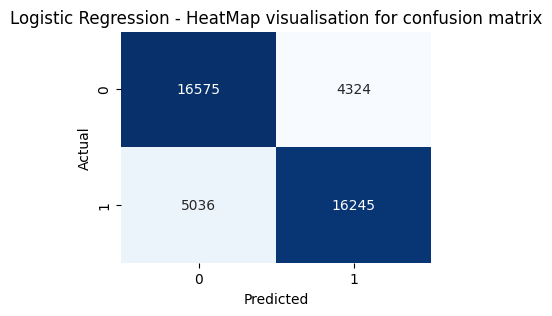

In [141]:
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix,annot=True,cmap="Blues",fmt='g',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - HeatMap visualisation for confusion matrix')
plt.show()

**Classification Report** of the model

In [142]:
print("Classification Report:")
print(classification_report(Y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     20899
           1       0.79      0.76      0.78     21281

    accuracy                           0.78     42180
   macro avg       0.78      0.78      0.78     42180
weighted avg       0.78      0.78      0.78     42180



**Accuracy Score of the model**

In [143]:
acc_score = accuracy_score(Y_test,y_pred)
print("Accuracy Score: ",round(acc_score*100,2))

Accuracy Score:  77.81


**ROC Curve and Optimising threshold**

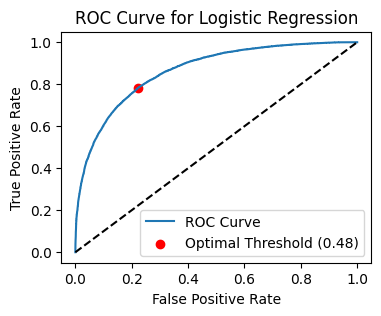

ROC-AUC Score:  86.39
Optimal Threshold:  0.48


In [144]:
y_prob = logistic_classifier.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test.values,y_prob)

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')

roc_auc = roc_auc_score(Y_test,y_prob)
optimal_threshold_index = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_threshold_index]

plt.scatter(fpr[optimal_threshold_index],tpr[optimal_threshold_index],marker='o',color='red',label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.legend()
plt.show()

print("ROC-AUC Score: ",round(roc_auc*100,2))
print("Optimal Threshold: ",round(optimal_threshold,2))

y_pred_adjusted = (y_prob >= optimal_threshold).astype(int)

**Classification Report after adjusting the model using optimal threshold**

In [145]:
print("Classification Report:")
print(classification_report(Y_test,y_pred_adjusted))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     20899
           1       0.78      0.78      0.78     21281

    accuracy                           0.78     42180
   macro avg       0.78      0.78      0.78     42180
weighted avg       0.78      0.78      0.78     42180



**Accuracy score after adjusting the model using optimal threshold**

In [146]:
acc_score = accuracy_score(Y_test, y_pred_adjusted)
print("Accuracy Score after adjusting the model: ",round(acc_score*100,2))

Accuracy Score after adjusting the model:  78.02


**Inferences from adjusting the model using optimal threshold**


*   The accuracy improved slightly from 77.81% to 78.02% after adjusting the model using the optimal threshold.
*   The increase in accuracy suggests that optimizing the decision threshold helped the model make better predictions on the test data, resulting in a slightly improved overall performance.


**k-fold Cross Validation**

K-fold cross-validation is a technique used in machine learning to assess the performance of a predictive model. It involves partitioning the dataset into k equal-sized folds (or subsets) and then iteratively training the model on k-1 folds while using the remaining fold as the validation set. This process is repeated k times, with each fold being used as the validation set exactly once.

Here, we take the value of k as 3

In [147]:
k = 3

cv_scores = cross_val_score(logistic_classifier,x,y,cv=k)

mean_cv_score = np.mean(cv_scores)
std_cv_score=np.std(cv_scores)

print("Cross Validation Scores: ",cv_scores)
print("Mean CV Score: ",mean_cv_score)
print("Standard Deviation of CV Scores: ",std_cv_score)

Cross Validation Scores:  [0.82667176 0.83493511 0.84508118]
Mean CV Score:  0.8355626793100086
Standard Deviation of CV Scores:  0.007528703588590492


**Inference**
*   The mean cross-validation score gives an overall estimate of the model's performance across different folds.
*   A high mean cross-validation score indicates that the model performs consistently well across various subsets of the data, suggesting good generalization ability.
*   The small standard deviation implies that the performance variation between different folds is minimal, indicating the stability of the model's performance.





**Test for overfit and underfit**

In [148]:
print("Training set score: ",logistic_classifier.score(X_train,Y_train))
print("Testing set score: ",logistic_classifier.score(X_test,Y_test))

Training set score:  0.7828777353659404
Testing set score:  0.7780938833570412


**Inference**

*   The model's performance on the training set is slightly higher than its performance on the testing set.
*   This indicates that the model might be slightly overfitting the training data, as it performs better on the data it has been trained on compared to new, unseen data.
*   However, the difference between the training and testing set scores is not significant, suggesting that the model generalizes reasonably well to unseen data.





**Optimizing regularisation hyperparameter**

In [149]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100]}

grid_search =  GridSearchCV(logistic_classifier,param_grid,cv=3)

grid_search.fit(X_train,Y_train)

best_params = grid_search.best_params_
print("Best Regularization Hyperparameter: ",best_params)

best_model = grid_search.best_estimator_
best_model_performance = best_model.score(X_test,Y_test)
print("Model performance with Best Hyperparameter: ",round(best_model_performance*100,2))


Best Regularization Hyperparameter:  {'C': 100}
Model performance with Best Hyperparameter:  78.05


**Inferences**


*   The grid search identified **C = 100** as the optimal regularization parameter for this logistic regression model.
*   With this optimal hyperparameter, the model's performance **improved to 78.05%**, indicating that less regularization led to a better fit to the training data.



# Gaussian Naive Bayes Classification

**Fitting Naive Bayes Classifier**

In [150]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train,Y_train)

y_pred = gaussian_nb.predict(X_test)

**Confusion Matrix**

In [151]:
conf_mat = confusion_matrix(Y_test,y_pred)
print("Confusion Matrix for Naive Bayes classifier")
print(conf_mat)

Confusion Matrix for Naive Bayes classifier
[[11914  8985]
 [ 5333 15948]]


**HeatMap visualisation** of the confusion matrix

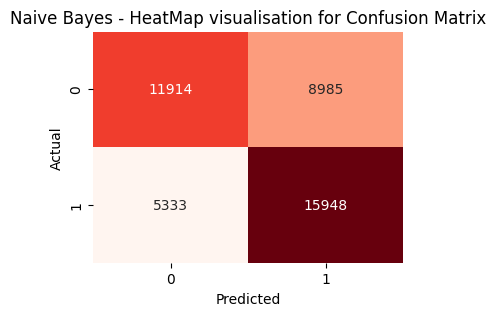

In [152]:
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat,annot=True,cmap='Reds',fmt='g',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes - HeatMap visualisation for Confusion Matrix')
plt.show()

**Classification Report** of the model

In [153]:
print("Classification Report: ")
print(classification_report(Y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.57      0.62     20899
           1       0.64      0.75      0.69     21281

    accuracy                           0.66     42180
   macro avg       0.67      0.66      0.66     42180
weighted avg       0.66      0.66      0.66     42180



**Accuracy Score**

In [154]:
acc_score = accuracy_score(Y_test,y_pred)
print("Accuracy Score: ",round(acc_score*100,2))

Accuracy Score:  66.06


**ROC Curve and Optimal Threshold**

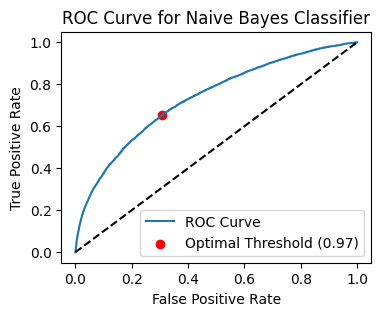

ROC-AUC Score:  73.29
Optimal Threshold:  0.97


In [155]:
y_prob = gaussian_nb.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test.values,y_prob)

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')

roc_auc = roc_auc_score(Y_test,y_prob)
optimal_threshold_index = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_threshold_index]

plt.scatter(fpr[optimal_threshold_index],tpr[optimal_threshold_index],marker='o',color='red',label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.legend()
plt.show()

print("ROC-AUC Score: ",round(roc_auc*100,2))
print("Optimal Threshold: ",round(optimal_threshold,2))

y_pred_adjusted = (y_prob >= optimal_threshold).astype(int)

**Classification Report after adjusting the model with optimal threshold**

In [156]:
print("Classification Report:")
print(classification_report(Y_test,y_pred_adjusted))

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.69      0.68     20899
           1       0.68      0.65      0.67     21281

    accuracy                           0.67     42180
   macro avg       0.67      0.67      0.67     42180
weighted avg       0.67      0.67      0.67     42180



**Accuracy score after adjusting the model with optimal threshold**

In [157]:
acc_score = accuracy_score(Y_test,y_pred_adjusted)
print("Accuracy score after adjusting the model: ",round(acc_score*100,2))

Accuracy score after adjusting the model:  67.28


**Inference**

*   The accuracy **improved from 66.06% to 67.28%** after adjusting the model with the optimal threshold.
*   Precision, recall, and F1-score for both classes (0 and 1) also improved slightly after adjusting the model, indicating that the model's performance across different evaluation metrics has improved.
*   The increase in accuracy suggests that optimizing the decision threshold helped the model make better predictions on the test data, resulting in improved overall performance.




**k-fold Cross Validation**


In [158]:
k = 3

cv_scores = cross_val_score(gaussian_nb,x,y,cv=k)

mean_cv_score = np.mean(cv_scores)
std_cv_score=np.std(cv_scores)

print("Cross Validation Scores: ",cv_scores)
print("Mean CV Score: ",mean_cv_score)
print("Standard Deviation of CV Scores: ",std_cv_score)

Cross Validation Scores:  [0.64371042 0.68913639 0.57820044]
Mean CV Score:  0.6370157497674858
Standard Deviation of CV Scores:  0.045536143115697335


**Inference**

*   The mean cross-validation score is approximately **63.70%**, indicating that, on average, **the model correctly predicts the target variable around 63.70% of the time across different folds** of the training data.
*   The standard deviation of the cross-validation scores is approximately **4.55%**, suggesting some **variability in the model's performance across different folds**.
*  The individual cross-validation scores range from 57.82% to 68.91%, indicating variability in the model's performance across different folds of the training data.






**Test for Overfit and Underfit**



In [159]:
print("Training set score: ",gaussian_nb.score(X_train,Y_train))
print("Testing set score: ",gaussian_nb.score(X_test,Y_test))

Training set score:  0.6603700893809715
Testing set score:  0.6605500237079185


**Inference**


*   Both the **training set score (66.04%)** and **testing set score (66.05%)** are **relatively close**, indicating that the model is **performing consistently** on both the training and testing data.
*   Indicates that there is no significant overfitting or underfitting issue with the model





# Conclusion

Based on the observations:

**Logistic Regression**


*   The initial accuracy of 77.81% increased to 78.02% after adjusting with an optimal threshold.
*   3-fold Cross Validation indicated a mean accuracy of 83.56% with a standard deviation of 0.75%.
*   The model's performace was slightly better on the training set indicating a over-fitting of data.
*   With optimal regularisation hyperparameter the accuracy increased to 78.05%.

**Naive Bayes Classifier**

*   The model achieved an accuracy score of 66.06% before adjusting with an optimal threshold, which increased to 67.28% after adjustment optimal threshold, indicating an improvement in performance.
*   Cross-validation scores indicated a mean accuracy of 63.70% with a standard deviation of 4.55%, suggesting some variability in performance across different folds of the data.
*   The model's training and testing set scores were similar (66.04% and 66.05%, respectively), indicating a reasonable fit without significant overfitting or underfitting issues.


In conclusion, both logistic regression and Naive Bayes classifiers demonstrated reasonable performance in predicting the target variable. Logistic regression showed slightly better performance in terms of accuracy and stability across different folds of the data compared to Naive Bayes.



